# Window size analysis

In this notebook we analysed the possible window size that we can use during the information extraction.
We want to understand what is the window that has the highest similarity value with the relation.

In [1]:
import pickle
import pandas as pd
import gensim
sys.path.append('..')
from lib.utils_similarity import UtilsSimilarity

### Load data and embedding

In [2]:
df = pd.read_csv("../data/only_diabete.csv")

In [3]:
df.shape

(9829, 12)

In [4]:
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(
    '../data/embeddings/BioWordVec_PubMed_MIMICIII_d200.vec.bin',
    binary=True,
    limit=int(4E7)
)

# Sample our dataset

In [5]:
df_sample = df.sample(frac=0.05, random_state=1)

In [6]:
df_sample.shape

(491, 12)

# Description

In [7]:
description_embedding_dict = pickle.load(open("../data/mapping_relations/relation_embeddings/description.pkl",'rb'))
description_dict = pickle.load(open("../data/mapping_relations/description.pkl",'rb'))

In [8]:
codes, windowed_notes = UtilsSimilarity().find_most_similar_part_in_the_note(df_sample, word2vec_model, description_dict)

In [9]:
all_similarities = UtilsSimilarity().find_best_window(codes, windowed_notes, description_dict, description_embedding_dict, word2vec_model, 3, 30)

In [10]:
window_length, mean_for_plot = UtilsSimilarity().compute_mean_per_window_size(all_similarities)

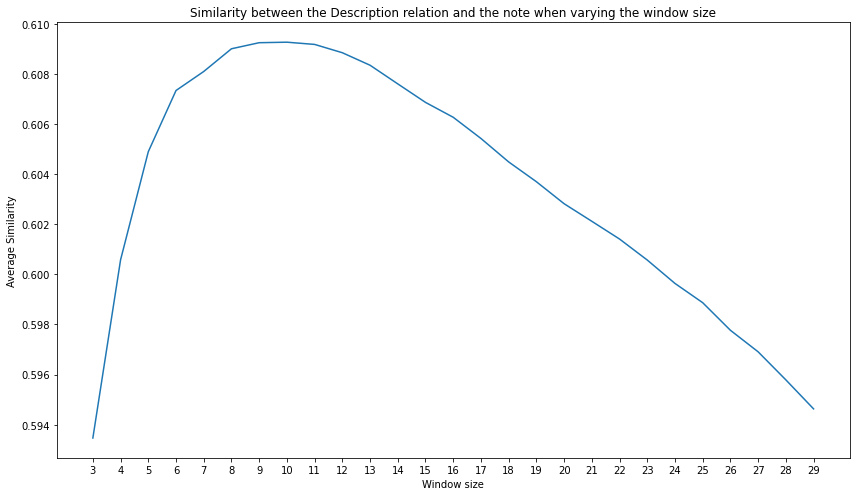

In [11]:
UtilsSimilarity().plot_window_analysis(window_length, mean_for_plot, "Description")


# Finding Site

In [12]:
finding_site_embedding_dict = pickle.load(open("../data/mapping_relations/relation_embeddings/finding_site.pkl",'rb'))
finding_site_dict = pickle.load(open("../data/mapping_relations/finding_site.pkl",'rb'))

In [13]:
codes, windowed_notes = UtilsSimilarity().find_most_similar_part_in_the_note(df_sample, word2vec_model, finding_site_dict)

In [14]:
all_similarities = UtilsSimilarity().find_best_window(codes, windowed_notes, finding_site_dict, finding_site_embedding_dict, word2vec_model, 3, 30)

In [15]:
window_length, mean_for_plot = UtilsSimilarity().compute_mean_per_window_size(all_similarities)

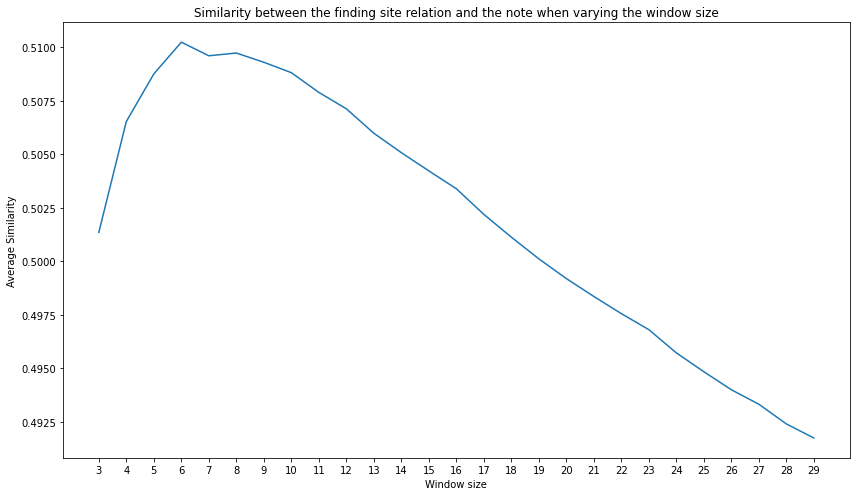

In [16]:
UtilsSimilarity().plot_window_analysis(window_length, mean_for_plot, "finding site")

## Associated Morphology

In [17]:
associated_morphology_embedding_dict = pickle.load(open("../data/mapping_relations/relation_embeddings/associated_morphology.pkl",'rb'))
associated_morphology_dict = pickle.load(open("../data/mapping_relations/associated_morphology.pkl",'rb'))

In [18]:
codes, windowed_notes = UtilsSimilarity().find_most_similar_part_in_the_note(df_sample, word2vec_model, associated_morphology_dict)

In [19]:
all_similarities = UtilsSimilarity().find_best_window(codes, windowed_notes, associated_morphology_dict, associated_morphology_embedding_dict, word2vec_model, 3, 30)

In [20]:
window_length, mean_for_plot = UtilsSimilarity().compute_mean_per_window_size(all_similarities)

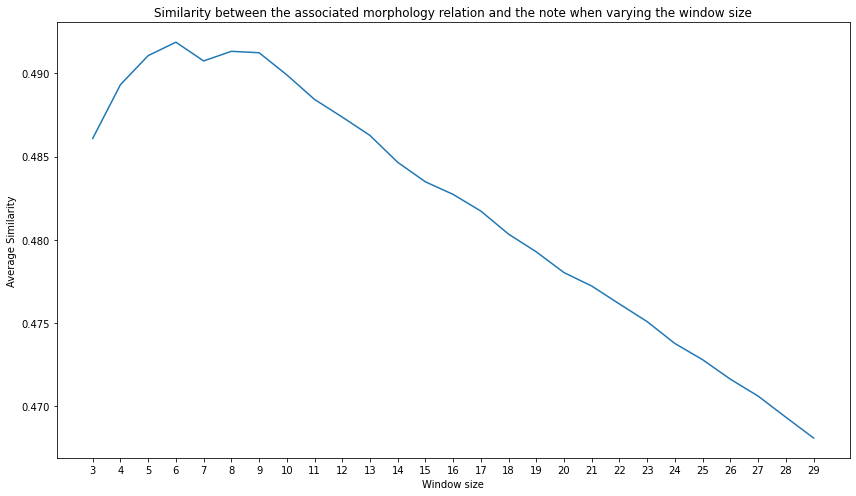

In [21]:
UtilsSimilarity().plot_window_analysis(window_length, mean_for_plot, "associated morphology")

## Due To

In [22]:
due_to_embedding_dict = pickle.load(open("../data/mapping_relations/relation_embeddings/due_to.pkl",'rb'))
due_to_dict = pickle.load(open("../data/mapping_relations/due_to.pkl",'rb'))

In [23]:
codes, windowed_notes = UtilsSimilarity().find_most_similar_part_in_the_note(df_sample, word2vec_model, due_to_dict)

In [24]:
all_similarities = UtilsSimilarity().find_best_window(codes, windowed_notes, due_to_dict, due_to_embedding_dict, word2vec_model, 3, 30)

In [25]:
window_length, mean_for_plot = UtilsSimilarity().compute_mean_per_window_size(all_similarities)

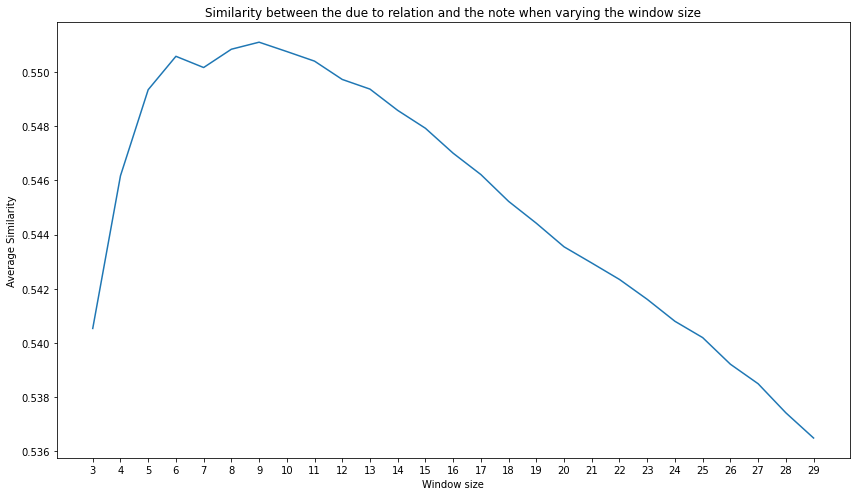

In [26]:
UtilsSimilarity().plot_window_analysis(window_length, mean_for_plot, "due to")